In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_4types

Welcome to JupyROOT 6.26/04


In [2]:
base_file_loc = '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'
base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/b2bii/etapip_eteeta/belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile'

In [3]:
!ls /share/storage/jykim/storage_b2/storage/reduced_ntuples/b2bii/etapip_eteeta/belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile

belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_charged.root
belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_charm.root
belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_mixed.root
belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_uds.root


In [4]:
!ls /home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT

ls: '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'에 접근할 수 없습니다: 그런 파일이나 디렉터리가 없습니다


In [5]:
# generic_ccbar = base_file_loc + 'ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00*.root'

generic_ccbar = base_file_loc + '/*charm.root'

# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + '/*uds.root'
# generic_ddbar = base_file_loc + '/*ddbar.root'
# generic_ssbar = base_file_loc + '/*ssbar.root'
generic_charged = base_file_loc + '/*charged.root'
generic_mixed = base_file_loc + '/*mixed.root'
# generic_taupair = base_file_loc + '/*taupair.root'

In [6]:
base_filter=' Dp_M>0'
# base_filter='etapip_gg_rank==1'
# base_filter+= '  && bdt>0.4'

# base_filter += ' && ((etapip_gamma1_clusterReg==1 && etapip_gamma1_E>0.05) || (etapip_gamma1_clusterReg==3 && etapip_gamma1_E>0.075) || (etapip_gamma1_clusterReg==2 && etapip_gamma1_E>0.05))'
# base_filter += ' && ((etapip_gamma2_clusterReg==1 && etapip_gamma2_E>0.05) || (etapip_gamma2_clusterReg==3 && etapip_gamma2_E>0.075) || (etapip_gamma2_clusterReg==2 && etapip_gamma2_E>0.05))'
# base_filter += ' && Pip_pionID > 0.6'
# base_filter += ' && etapip_Eta_p > 0.8'
# base_filter += ' && etapip_Eta_M > 0.52'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'
# base_filter += ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7'
# base_filter += ' && dM_pi0_75MeV>0.011 && dM_pi0_75MeV_2>0.011 && Dp_CMS_p>3'

# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'



# base_filter += " && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1 && \
#                 etapip_Eta_M>0.535 && \
#                 abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5 && eta_Pi0_daughterAngle_0_1<1.4 && eta_Pi0_M>0.12 && \
#                 etapip_Eta_p>0.8 && etapip_pi0_gamma1_p>0.075 && etapip_pi0_gamma2_p>0.075 && Dp_CMS_p>3 && \
#                 Pih_pionID>0.6 && eta_Pip_pionID>0.6 && eta_Pim_pionID>0.6"

# 0.523598
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_gamma1_p>0.1 && etapip_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '


In [11]:
tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_p',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1","eta_Pi0_Easym",\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_mcPDG','Pip_dr','Pip_dz','Pip_p','Pip_pt','num_Dstar_no_nan']

In [12]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
# pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [25]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
# pd_ddbar = pd_ddbar_0.reset_index(drop=True)
# pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
# pd_taupair = pd_taupair_0.reset_index(drop=True)

In [26]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) 
            # len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) 
                # len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

5508755
7470268
0.7374240120970225


In [27]:
cut = 'Dp_M>0.0'
# cut += '& Dp_M>1.78 & Dp_M<1.95' 

# cut = 'bdt>0.4'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_charged, pd_mixed = cut_dfs_4types(cut, pd_ccbar, pd_uubar,pd_charged, pd_mixed)

In [28]:
# Extract the directory from the file path
# plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_yes_tag/cut_study"
plot_directory = "/share/storage/jykim/storage_b2/storage/PLOTS/b2bii/belle_etaetapip_loose_v0_240903_Kp_BCS_etapi0const/cut_study"
# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [29]:
var = 'Dp_M'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$711\; \mathrm{fb}^{-1}$"
xrange = (1.6,2.1)
nbins=50
img_path=''
xlabel=''

In [30]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",force_range=tuple(),unit="[GeV/c^2]" ):
    data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [  r'$B^0\bar{B}^0$', r'$B^+B^-$',r'$u\bar{u},d\bar{d},s\bar{s}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range,save_repo=img_path)
    plt.tight_layout()

    # plt.savefig(img_path)

In [31]:
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$711\; \mathrm{fb}^{-1}$"

[99227. 97890. 96746. 95614. 95803. 93022. 92574. 91232. 90716. 88892.
 87836. 86818. 85868. 85413. 83502. 81745. 81364. 79868. 78892. 77509.
 76306. 75643. 73770. 73357. 72089. 71783. 70675. 70532. 69805. 69167.
 68996. 69108. 69724. 67969. 66362. 64996. 63131. 61967. 61226. 60550.
 60367. 59675. 59215. 58187. 57757. 57948. 57743. 57777. 58531. 59613.
 62565. 66419. 70811. 70160. 63961. 57998. 53527. 51733. 50493. 49852.
 48976. 48944. 48446. 47797. 47446. 47432. 46177. 45773. 45470. 45486.]
fitst_bin_entries=99227.0


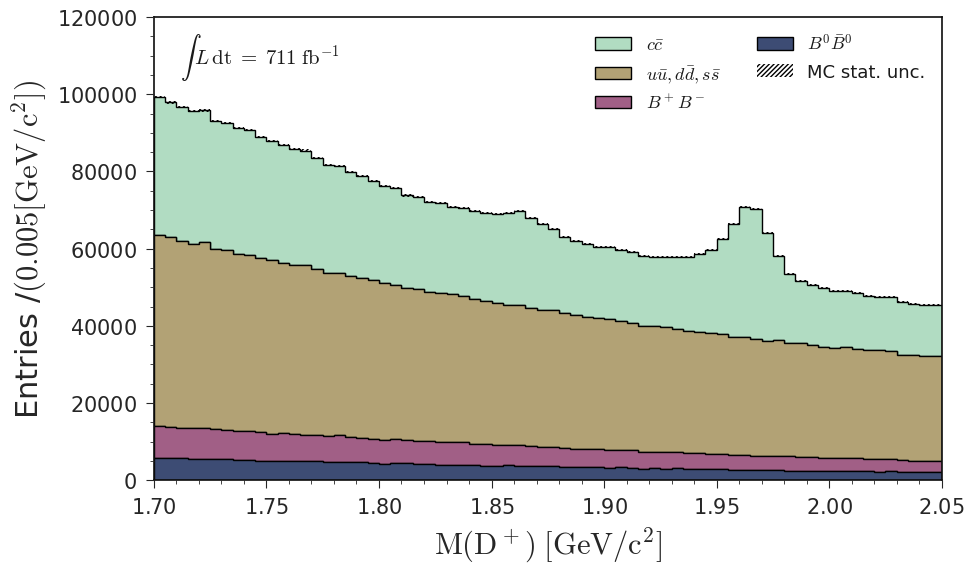

In [32]:
var = 'Dp_M'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
xrange = (1.67,2.1)
xrange = (1.7,2.05)

nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/b2bii_Dpetapip_pipipi_loose_v0_all.png"
# img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_all_nontag.png"

# img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="")
# plt.ylim(0,90000)
# plt.savefig(img_path)


[0.000000e+00 7.112493e+06 0.000000e+00 2.909520e+05 5.288300e+04
 1.066400e+04 2.445000e+03 6.280000e+02 1.260000e+02 5.300000e+01
 1.600000e+01 5.000000e+00]
fitst_bin_entries=0.0


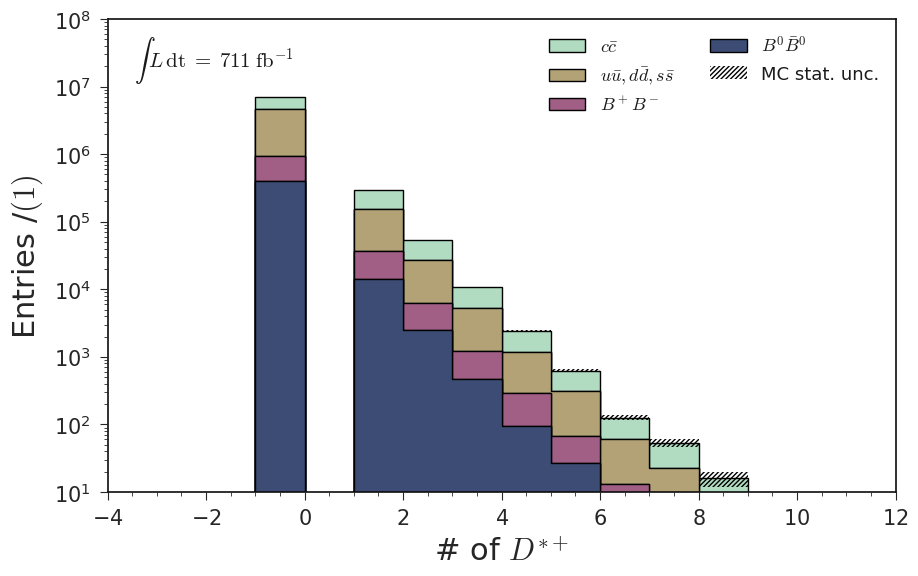

In [33]:
var = 'num_Dstar_no_nan'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
xrange = (1.67,2.1)
xrange = (-2,10)
nbins = 12
xlabel = r"# of $D^{*+}$"
unit = ""

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/b2bii_Dpetapip_pipipi_loose_v0_all_num_Dstar_no_nan.png"

img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",unit=unit)
# plt.ylim(0,90000)
plt.yscale("log")
# plt.tight_layout()
# plt.savefig(img_path)


In [34]:
cut = 'Dp_M>0.0'
cut += ' & num_Dstar_no_nan<0'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_charged, pd_mixed = cut_dfs_4types(cut, pd_ccbar, pd_uubar,pd_charged, pd_mixed)

[94621. 93254. 92210. 91240. 91413. 88591. 88305. 86821. 86351. 84774.
 83634. 82666. 81744. 81211. 79528. 77801. 77449. 75846. 75050. 73769.
 72511. 71902. 70063. 69680. 68548. 68126. 67233. 66937. 66284. 65587.
 65393. 65268. 65849. 64200. 62714. 61635. 60013. 58784. 58250. 57424.
 57351. 56610. 56328. 55336. 54889. 55055. 54850. 54884. 55689. 56710.
 59657. 63304. 67663. 67070. 61012. 55228. 50824. 49100. 47942. 47315.
 46479. 46503. 45966. 45406. 44965. 45060. 43813. 43387. 43280. 43191.]
fitst_bin_entries=94621.0


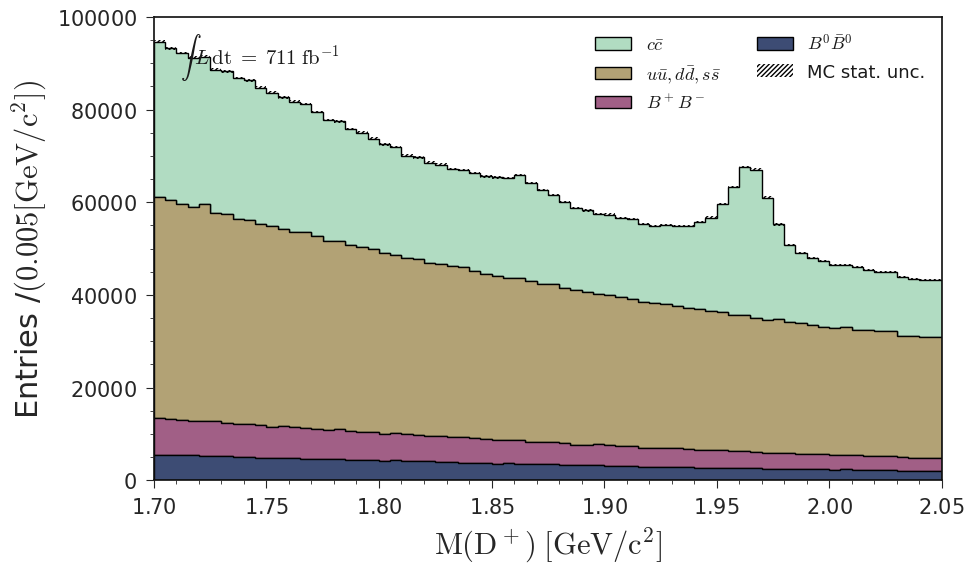

In [35]:
var = 'Dp_M'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.7,2.05)
nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step1.png"
img_path = plot_directory + "/b2bii_Dpetapip_pipipi_loose_v0_step1_Dstartag_yestag.png"
img_path = plot_directory + "/b2bii_Dpetapip_pipipi_loose_v0_step1_Dstartag_nontag.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)